# 📋 Customer Satisfaction Survey Report
## 🧭 Introduction 

This is an exploratory data analysis (EDA) report based on anonymized customer survey data. The original dataset contained over 7,000 responses collected to evaluate product satisfaction across multiple dimensions.

Participants answered 12 Likert-scale questions, one binary (yes/no) question, and two open-ended questions. To protect confidentiality and respect prior professional agreements, all data has been thoroughly anonymized and obfuscated.

This report does **not** aim to present specific findings about any particular product. Instead, it demonstrates how meaningful analytical work — including visual exploration, sentiment structuring, and open-text preprocessing — can still be carried out under strong privacy constraints.

A detailed summary of the anonymization techniques used can be found in the next section.

## 🔐 Data Anonymization Summary

The dataset was anonymized to ensure participant privacy and reusability. The following steps were applied:

### 1. Column Shuffling & Renaming
- Survey question columns were shuffled and renamed generically (e.g., `Question1`, `Question2`, ...).

### 2. Identifier Hashing
- Personal identifiers were hashed using SHA-256 with prefixes (e.g., `ID_xxxxxx`), ensuring consistent but irreversible anonymization.

### 3. Timestamp Obfuscation
- Dates were shifted by a random, consistent offset to preserve time intervals without revealing actual submission times.

### 4. Likert Scale Normalization
- Response values were standardized for sentiment labeling.

### 5. Free-Text Obfuscation
- Named entities (e.g., names, places) were replaced with placeholders.
- Remaining text was reworded using random substitutions based on part-of-speech (POS) tags.
- Fallback substitutions handled unrecognized or technical terms.

### 6. Export
- The sanitized dataset was exported for further analysis using only anonymized content.

### 🧪 Simulated Example: Before and After Anonymization

| Feature              | Before (Simulated Example)       | After (Anonymized)         | Technique                        |
|----------------------|----------------------------------|-----------------------------|----------------------------------|
| Survey Column Name   | "satisfaction_Q1"               | "Question1"                 | Column Renaming & Shuffling      |
| Participant ID       | "customer_456"                  | "ID_7f9b23..."              | SHA-256 Hash with Prefix         |
| Submission Date      | "2023-06-01 12:45:22"           | "2023-04-12 12:45:22"       | Timestamp Shifting               |
| Likert Answer        | "Strongly agree"                | "Positive (Strong)"         | Likert Scale Normalization       |
| Free Text            | "I had issues in Dublin"        | "I had issues in [CITY]"    | Named Entity Obfuscation         |
| Technical Phrase     | "VPN gateway failed"            | "connection system failed"  | POS-based Word Substitution      |




## 🧹 Methodology  
First all necessary libraries are imported. Then the data set is being cleaned up for further analysis. Also, some more data points are engineered to create more insight. For this, a score system is being generated from the Likert Scale answers to condense the customer satisfaction in one metric. 

Additionaly, the time spent within the survey is being calculated to rinse out any outliers, e.g. customers who went AFK or spent minimal time on the survey. Furthermore, some data points were clustered into groups to make analysis easier. Lastly, further columns have been added for hour, day of the week, month, and year, for further more detailed analysis in the future.

## 🧰 Imports  
Here we import necessary libraries. Pandas and numpy will be used for typical data wrangling and cleanup. Datetime is used to reformat the date and time data. Lastly, Matplotlib and seaborn is used for visualization.

In [67]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## 🧼 Data Cleaning & Feature Engineering 
Here we load the data set that was anonymized and obfuscated beforehand. Also, we drop redundant columns, and create a new column depicting the time spent with the survey by each customer. We do this by calculating the distance between two timestamps in the dataset.

In [68]:
df = pd.read_csv('anon_survey.csv')

# DROP IRRELEVANT COLUMNS
df = df.drop(['respondent_id', 'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1']
            ,axis=1)

# EDIT TIMESTAMP DATA
# set to datetime
df['date_created'] = pd.to_datetime(df['date_created'])
df['date_modified'] = pd.to_datetime(df['date_modified'])

# calculate difference
# df['date_modified'].iloc[1] - df['date_created'].iloc[1]
df['Survey Time'] = df['date_modified'] - df['date_created']

# convert to seconds
df['Survey Time'] = df['Survey Time'] / np.timedelta64(1, 's')

# It took myself approx 3 minutes to do the survey

# TIME SPENT ON SURVEY
# Impute Outliers
df[df['Survey Time'] < 900]['Survey Time'].mean()
# 226.690197 -> 230 approx.

def cap_time(sec):
    if sec > 1200:
        return 230
    else:
        return sec

df['Survey Time'] = df['Survey Time'].apply(cap_time)


# CLean some more
df = df.drop(['collector_id','date_created','language'],axis=1)

### Implement Score System
Next we create a score system. This we do by mapping the answers on the Likert Scale with numbers for points. Then we summarize the points from each question into one column which shows the overall score for each customer.

In [69]:
# TURN RESPONSE INTO SCORES
qur = {"Negative (Strong)":1,
       "Negative":2,
       "Positive":3,
       "Positive (Strong)":4}

# LETS MAP!
dfq = df[df.columns[4:16]].apply(lambda x: x.map(qur))
dfq['Score'] = dfq.sum(axis=1)
dfq['QAX'] = df['QAX']

# ADD SCORE TO DF
df['Score'] = dfq['Score']

### Add hour, day of the week, month, and year
Further analysis might require to look deeper into when the survey was completed. Therefore we additionally segment the timestamp data into further columns: hour, day, month, and year.

In [30]:
#Convert datetime column/series to hour of the day. NB: Column must be in datetime format.
df['hour'] = df['date_modified'].dt.hour
#Convert datetime column/series to day of the week
df['day'] = df['date_modified'].dt.isocalendar().day
#Convert datetime column/series to month
df['month'] = df['date_modified'].dt.month
#Convert datetime column/series to year
df['year'] = df['date_modified'].dt.year
#NB: Weekday/Month will be in int. Eg. for months, January=1, February=2...etc,

## 📊 Exploratory Data Analysis  
It is important to note, that with the data set being anonymized and obfuscated, the parameters and attributes will appear very vague and abstract. During the analysis,s three parameters will be used to categorize the data:

QAX

QBX

QCX

For ease of interpretation, one can assume these parameters to hold any kind of data like age or country of the customers, or models of the product or even subscription types etc. Obfuscation requires these to remain vague so that the anonymity of the original data remains uncompromised. Additionally, it should be mentioned that also the data points held within each parameter are obfuscated as well:

QAX {AX1, AX2, ...}

QBX {BX1, BX2, ...}

QCX {LX_A, LX_B, ...}



### Generall participation
Generally speaking, LX_D holds the highest amount of survey subjects. Among all QCX it seems that usually BX0 and BX1 hold the most frequent appearances. 

C:\Users\rosic\AppData\Local\Temp\ipykernel_1388\717355948.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='QBX', order=qbx_order, ax=ax2, palette=colors)


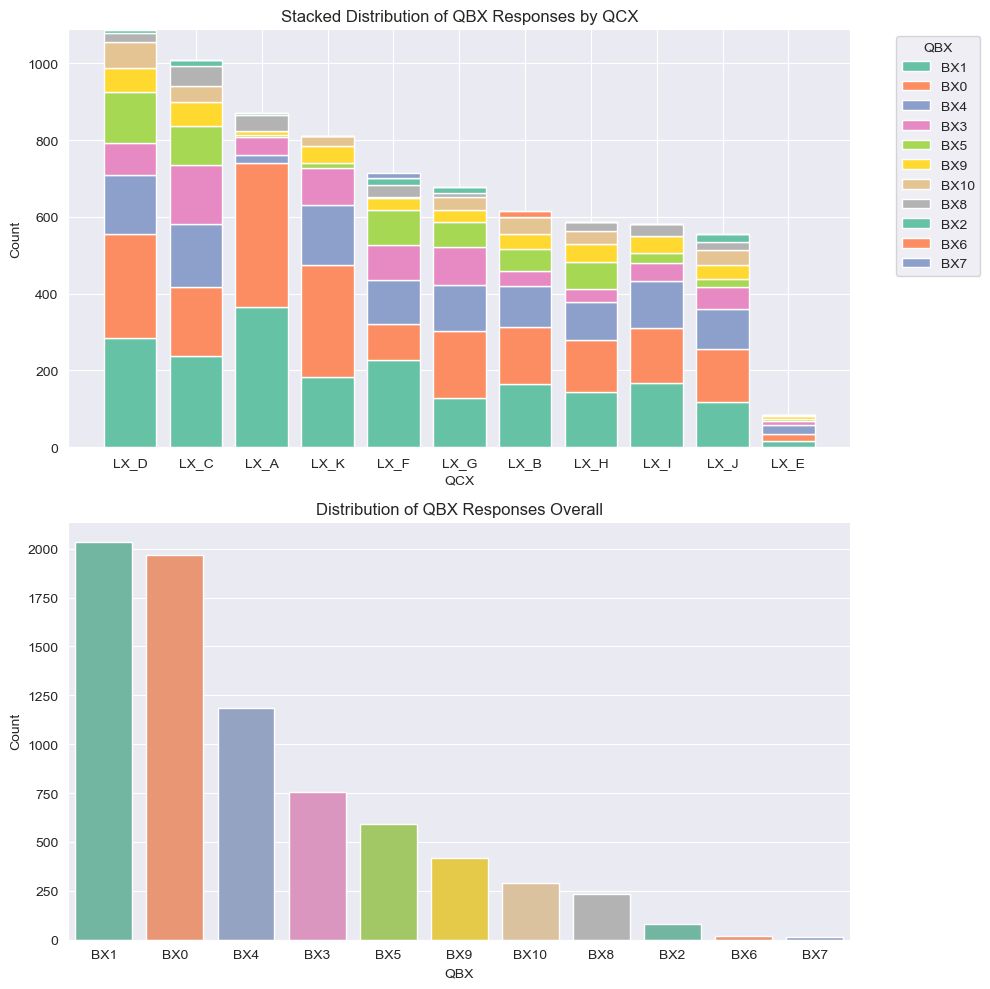

In [64]:
# Prepare the data: count of QBX per QCX
stacked_data = pd.crosstab(df['QCX'], df['QBX'])

# Sort QCX by total count
stacked_data = stacked_data.loc[stacked_data.sum(axis=1).sort_values(ascending=False).index]

# Determine QBX order by overall frequency
qbx_order = df['QBX'].value_counts().sort_values(ascending=False).index.tolist()

# Consistent color palette for QBX
colors = dict(zip(qbx_order, sns.color_palette("Set2", n_colors=len(qbx_order))))

# Set style
sns.set_style('darkgrid')
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 10))

# --- First plot: Stacked bar of QBX by QCX ---
bottom = None
for col in qbx_order:
    ax1.bar(
        stacked_data.index,
        stacked_data[col],
        bottom=bottom,
        label=col,
        color=colors[col]
    )
    bottom = stacked_data[col] if bottom is None else bottom + stacked_data[col]

ax1.set_ylabel("Count")
ax1.set_xlabel("QCX")
ax1.set_title("Stacked Distribution of QBX Responses by QCX")
ax1.legend(title="QBX", bbox_to_anchor=(1.05, 1), loc='upper left')

# --- Second plot: Count of QBX overall, sorted ---
sns.countplot(data=df, x='QBX', order=qbx_order, ax=ax2, palette=colors)

ax2.set_title("Distribution of QBX Responses Overall")
ax2.set_ylabel("Count")
ax2.set_xlabel("QBX")

# Adjust layout
plt.tight_layout()
plt.show()


### How many survey participants answered yes or no?
Typically speaking binary questions like this tend to be about "Would you buy the product again?" or "Would you recommend this product?" etc. In this case it seems that LX_G and LX_K performed best while LX_E and LX_J seem to have some problems.

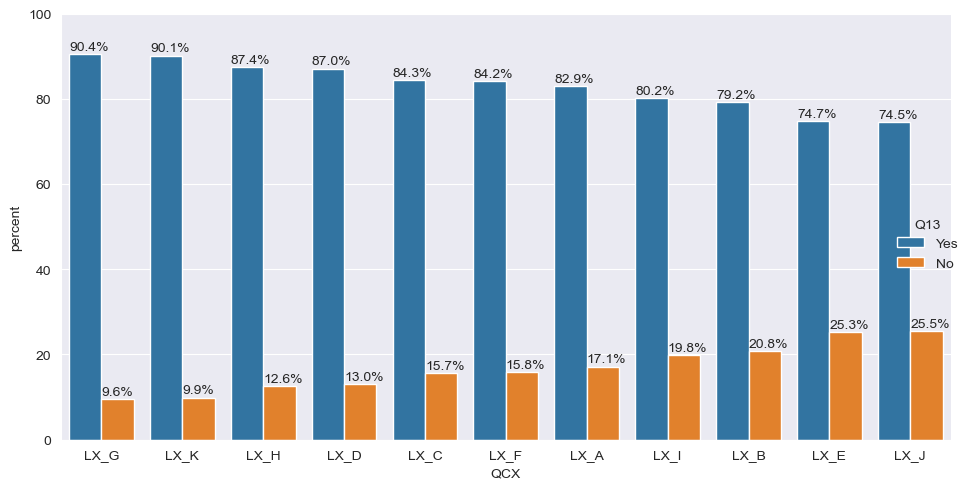

In [23]:
x, y = 'QCX', 'Q13'

# Normalize and calculate percentage
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100).rename('percent').reset_index()

# Get order of QCX based on descending % of "Yes"
yes_order = (
    df1[df1[y] == 'Yes']
    .sort_values('percent', ascending=False)[x]
    .tolist()
)

# Plot
g = sns.catplot(
    data=df1,
    x=x,
    y='percent',
    hue=y,
    kind='bar',
    order=yes_order,
    height=5,
    aspect=1.8
)

g.ax.set_ylim(0, 100)

# Add percentage labels
for p in g.ax.patches:
    height = p.get_height()
    if height > 0:
        txt = f'{height:.1f}%'
        g.ax.text(p.get_x(), height + 1, txt)

plt.tight_layout()
plt.show()


### Whats the scoring performance for QBX?
We use boxplots to visualize the distribution of scoring points among QBX. Theboxplots show the distribution in quartiles, with the line in the middle of the box depicting the median average. Originally, the order was sorted by the median, but ordering by the upper quartile might show a better sorting order, since we are more interested in high scoring. 

It is clear that BX6 received the best scores, with even the lower scores mostly outperforming the other BX. BX2 also has high scoring values, but also shows a very wide first (lower) quartile. Also interestingly, most of the lowest scores among other BX appear merely as outliers (dots below the whiskers). BX7 is the only one where there was no instance of customers giving max scoring.

The necessary approach here would be to try to raise the the lower whiskers and remedy the outliers if possible. 

C:\Users\rosic\AppData\Local\Temp\ipykernel_1388\361320065.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="QBX", y="Score", order=median_order, palette=palette, ax=ax1)
C:\Users\rosic\AppData\Local\Temp\ipykernel_1388\361320065.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="QBX", y="Score", order=q3_order, palette=palette, ax=ax2)


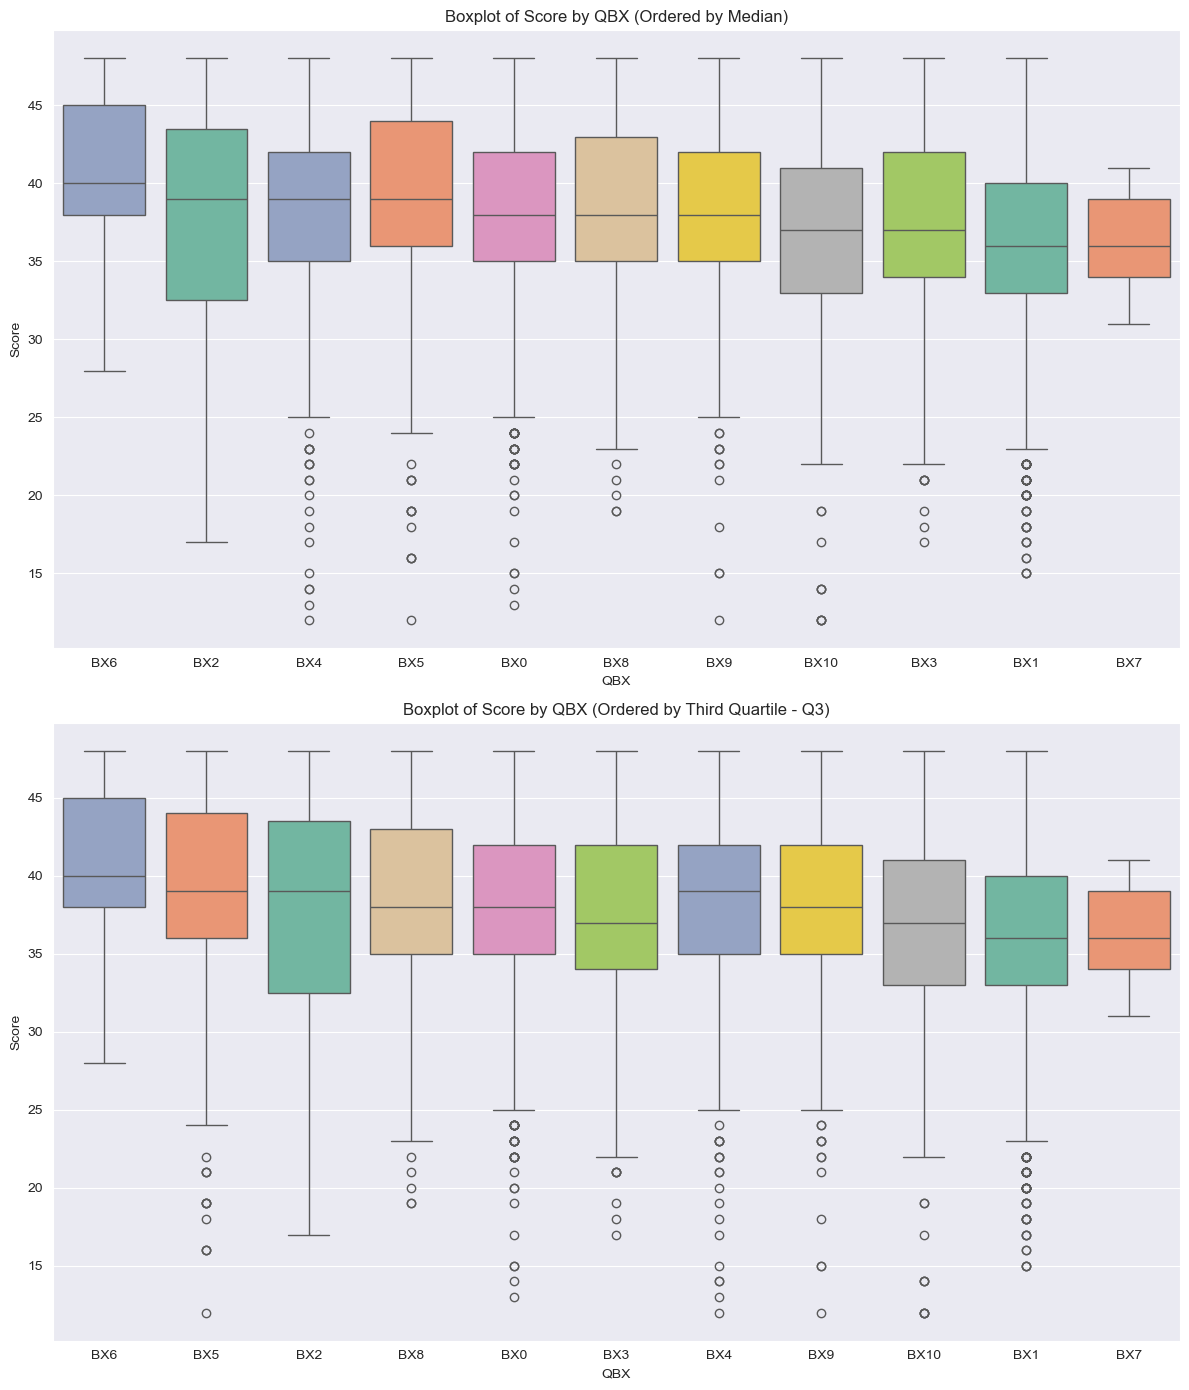

In [24]:
# Define orders
median_order = df.groupby("QBX")["Score"].median().sort_values(ascending=False).index
q3_order = df.groupby("QBX")["Score"].quantile(0.75).sort_values(ascending=False).index

# Define consistent color palette for all QBX values
qbx_categories = df["QBX"].unique()
palette = dict(zip(
    qbx_categories,
    sns.color_palette("Set2", n_colors=len(qbx_categories))
))

# Set style
sns.set_style("darkgrid")
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 14), sharey=True)

# First plot: Ordered by median
sns.boxplot(data=df, x="QBX", y="Score", order=median_order, palette=palette, ax=ax1)
ax1.set_title("Boxplot of Score by QBX (Ordered by Median)")
ax1.set_xlabel("QBX")
ax1.set_ylabel("Score")

# Second plot: Ordered by Q3
sns.boxplot(data=df, x="QBX", y="Score", order=q3_order, palette=palette, ax=ax2)
ax2.set_title("Boxplot of Score by QBX (Ordered by Third Quartile - Q3)")
ax2.set_xlabel("QBX")
ax2.set_ylabel("Score")

plt.tight_layout()
plt.show()

### Show correlation between two parameters such as QBX and QCX with a heatmap of the score
Here we can easily locate the highest and worst performars when aligning our parameters QBX and QCX. However, it seems that certain datapoints hold no scoring, e.g. we have no customers for BX10 and LX_A. This also somewhat explain the shape of the boxplot of BX7: low participation of survey subjects, namely only for LX_F. Since we can observe something similar for BX6, it is fair to assume, that more participants entail a wider range of scores given. 

Therefore to ease analysis we remove instances of no scoring and additionaly structure the data a bit more with a clustermap. Here we can see, that BX5 performes best with LX_K and LX_J. Lowest Scores are found for BX1 with LX_E and LX_J, which will require more attention for improvement. 

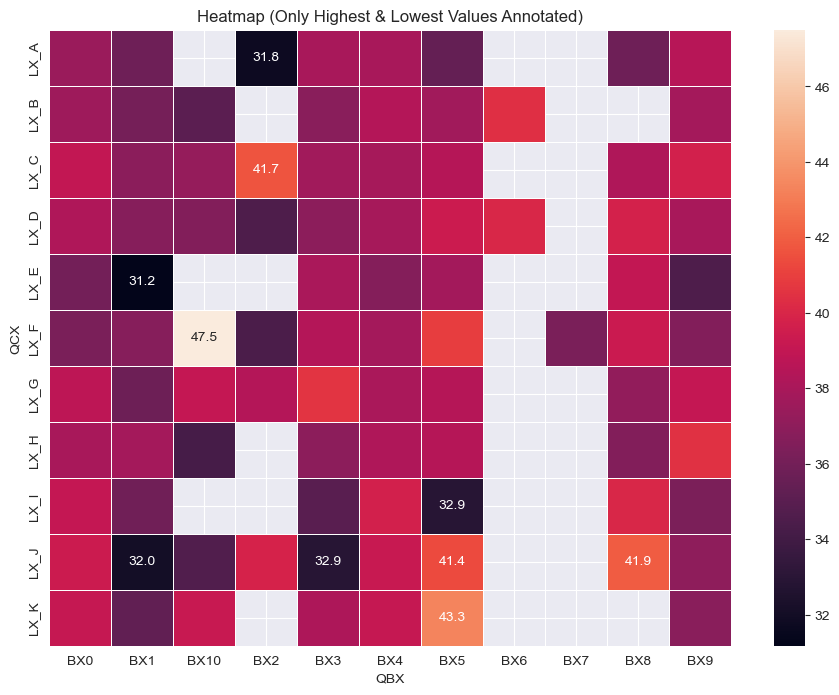

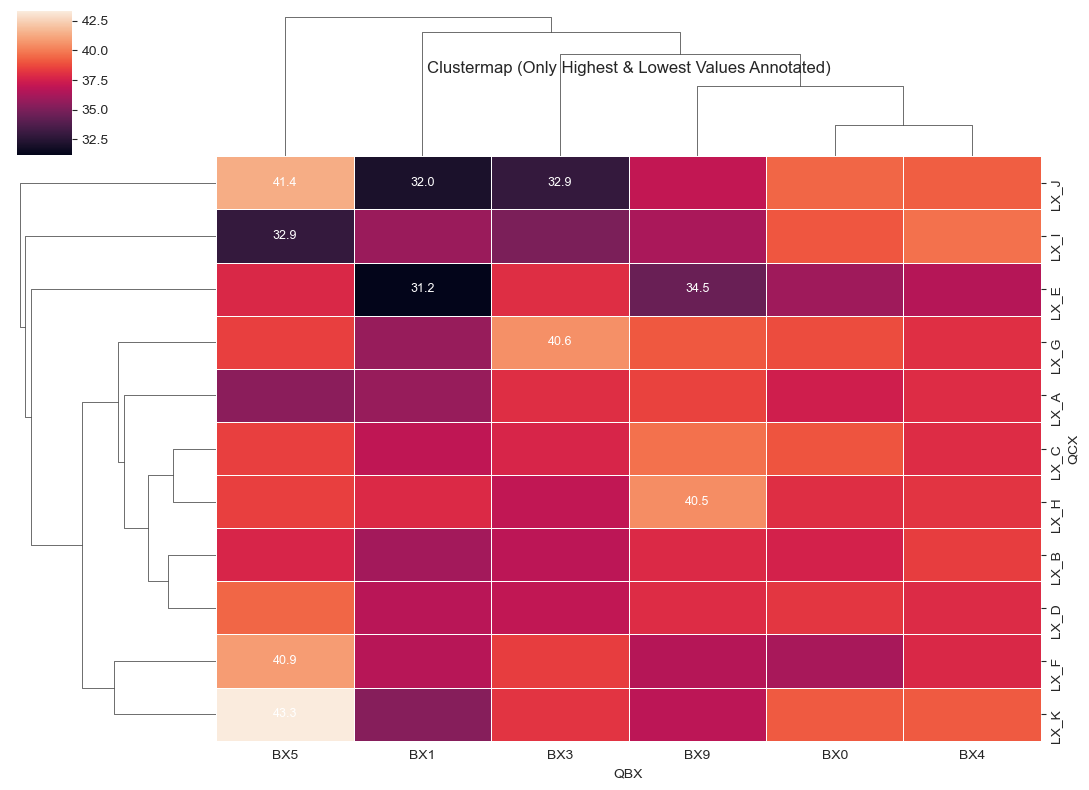

In [25]:
# Create pivot table
pivot = df.pivot_table(values='Score', index='QCX', columns='QBX')

# Find top 5 and bottom 5 values
sorted_vals = pivot.stack().sort_values()
highlight_cells = pd.concat([sorted_vals.head(5), sorted_vals.tail(5)])

# ---------- HEATMAP ----------
# Create annotation DataFrame
annot = pivot.copy().astype(str)
for i in pivot.index:
    for j in pivot.columns:
        if (i, j) in highlight_cells.index:
            annot.loc[i, j] = f"{pivot.loc[i, j]:.1f}"
        else:
            annot.loc[i, j] = ""

# Plot heatmap with selected annotations
plt.figure(figsize=(11, 8))
sns.heatmap(pivot, cmap='rocket', annot=annot, fmt='', linewidths=0.5)
plt.title('Heatmap (Only Highest & Lowest Values Annotated)')
plt.show()


# ---------- CLUSTERMAP ----------
# Drop certain columns
cluster_data = pivot.drop(['BX2', 'BX6', 'BX7', 'BX8', 'BX10'], axis=1)

# Recompute highlight_cells based on cluster_data only
sorted_cluster_vals = cluster_data.stack().sort_values()
highlight_cluster_cells = pd.concat([
    sorted_cluster_vals.head(5),
    sorted_cluster_vals.tail(5)
])

# Create clustermap
cluster = sns.clustermap(cluster_data, cmap='rocket', figsize=(11, 8), linewidths=0.5)

# Annotate selected cells manually
# Get clustered index/column order
row_order = cluster.dendrogram_row.reordered_ind
col_order = cluster.dendrogram_col.reordered_ind
row_labels = cluster_data.index[row_order]
col_labels = cluster_data.columns[col_order]

# Annotate only the highlighted cells
for i, row in enumerate(row_labels):
    for j, col in enumerate(col_labels):
        if (row, col) in highlight_cluster_cells.index:
            val = cluster_data.loc[row, col]
            cluster.ax_heatmap.text(j + 0.5, i + 0.5, f"{val:.1f}",
                                    ha='center', va='center', color='white', fontsize=9)

cluster.ax_heatmap.set_title("Clustermap (Only Highest & Lowest Values Annotated)", pad=60)
plt.show()

### How are the answers for the Likert Scale questions distributed?
In order to better depict negative vs. positive answers, the answers were aligned on a vertical axis, with negative answers increasing to the left while positive anwers pushed to the right. With this it is better clearly visible whether answers are rather skewed to the negative (left) or positive (right).

Q4 and Q9 show the most room for improvement, while customers seemed most satisfied regarding Q6, Q8 and Q10.

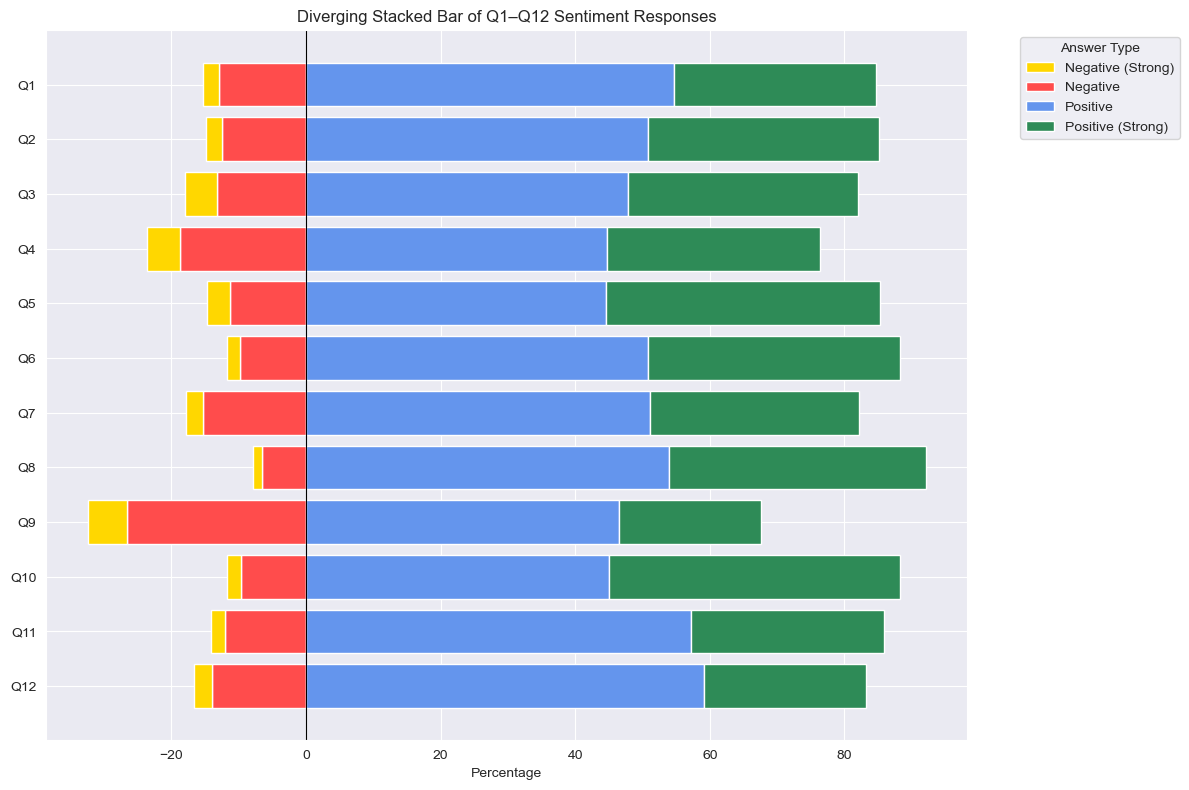

In [46]:
# Define Q columns
q_cols = [f"Q{i}" for i in range(1, 13)]

# Create percentage table
qperc = pd.concat(
    [df[col].value_counts(normalize=True).mul(100) for col in q_cols],
    axis=1
)
qperc.columns = q_cols
qperc = qperc.transpose()

# Multiply negatives by -1
for col in ['Negative', 'Negative (Strong)']:
    if col in qperc.columns:
        qperc[col] *= -1

# Custom colors
custom_colors = {
    'Negative': '#FF4C4C',
    'Negative (Strong)': '#FFD700',
    'Positive': '#6495ED',
    'Positive (Strong)': '#2E8B57'
}
legend_order = ['Negative (Strong)', 'Negative', 'Positive', 'Positive (Strong)', ]
plot_order = ['Negative', 'Negative (Strong)', 'Positive', 'Positive (Strong)']

# Initialize figure
fig, ax = plt.subplots(figsize=(12, 8))

# Initialize positive and negative stack trackers
pos_bottom = np.zeros(len(qperc))
neg_bottom = np.zeros(len(qperc))

# Reverses row order: Q12 → Q1
qperc = qperc.iloc[::-1]

# Plot each bar segment
for label in plot_order:
    if label in qperc.columns:
        values = qperc[label].fillna(0)
        if values.max() < 0:
            # Negative stack (to the left)
            ax.barh(qperc.index, values, left=neg_bottom, color=custom_colors[label], label=label)
            neg_bottom += values
        else:
            # Positive stack (to the right)
            ax.barh(qperc.index, values, left=pos_bottom, color=custom_colors[label], label=label)
            pos_bottom += values

# Styling
ax.axvline(0, color='black', linewidth=0.8)
ax.set_xlabel("Percentage")
ax.set_title("Diverging Stacked Bar of Q1–Q12 Sentiment Responses")

# Reordered legend
handles, labels = ax.get_legend_handles_labels()
legend_dict = dict(zip(labels, handles))
ax.legend(
    [legend_dict[l] for l in legend_order if l in legend_dict],
    [l for l in legend_order if l in legend_dict],
    title="Answer Type",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


### Natural Language Processing
Remember here that the open question answers contain free text that has been obfuscated. This means that each word has been replaced by another word randomly. Merely the part of speech remained the same. Therefore the distribution of the data will appear highly artificial. The idea here is to merely show what is possible with regards of natural language processing and visualization. 

In [65]:
# Convert floats to string
df['Q14'] = df['Q14'].apply(str)
df['Q15'] = df['Q15'].apply(str)
df['Q16'] = df['Q16'].apply(str)

# measure length of string
df['Q14_len'] = df['Q14'].apply(len)
df['Q15_len'] = df['Q15'].apply(len)
df['Q16_len'] = df['Q16'].apply(len)

### What is the relationship between text length and answering yes/no?
Usually negative feedback is communicated in a more lengthy way. Here we check whether customers that answered yes or no had a lengthy response for questions Q14, Q15, and Q16. However, we observe that due to outliers the plots are somewhat hard to analyse. Therefore we omit these for ease of analysis.

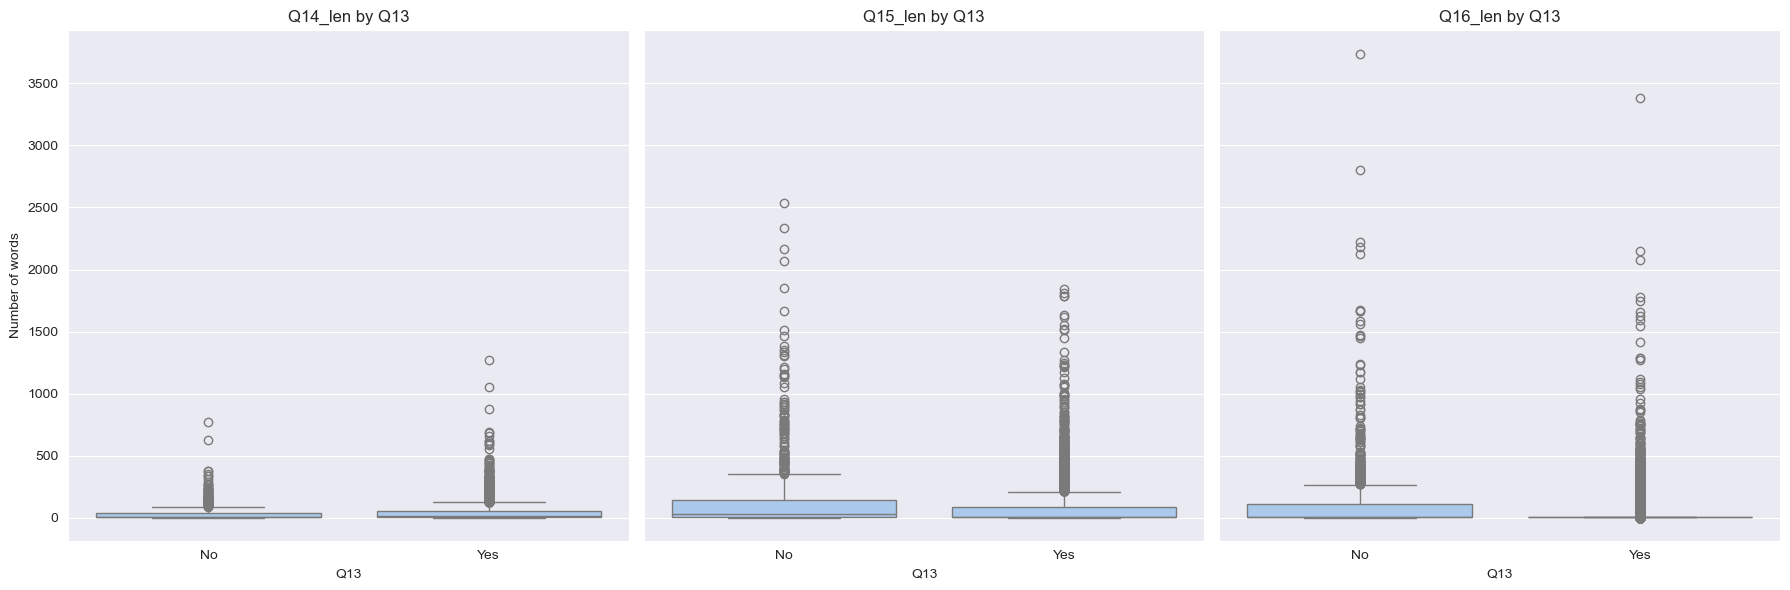

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure with 3 subplots in one row
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.set_palette('pastel')

# Boxplot for Q14_len
sns.boxplot(data=df, x='Q13', y='Q14_len', ax=axes[0])
axes[0].set_title('Q14_len by Q13')
axes[0].set_ylabel('Number of words')

# Boxplot for Q15_len
sns.boxplot(data=df, x='Q13', y='Q15_len', ax=axes[1])
axes[1].set_title('Q15_len by Q13')
axes[1].set_ylabel('')  # Avoid repeating label

# Boxplot for Q16_len
sns.boxplot(data=df, x='Q13', y='Q16_len', ax=axes[2])
axes[2].set_title('Q16_len by Q13')
axes[2].set_ylabel('')  # Avoid repeating label

# Improve layout
plt.tight_layout()
plt.show()



Here we can see that particularly for Q15 and Q16 the answers were quite long for those participants who ansered 'No' in Q13. 

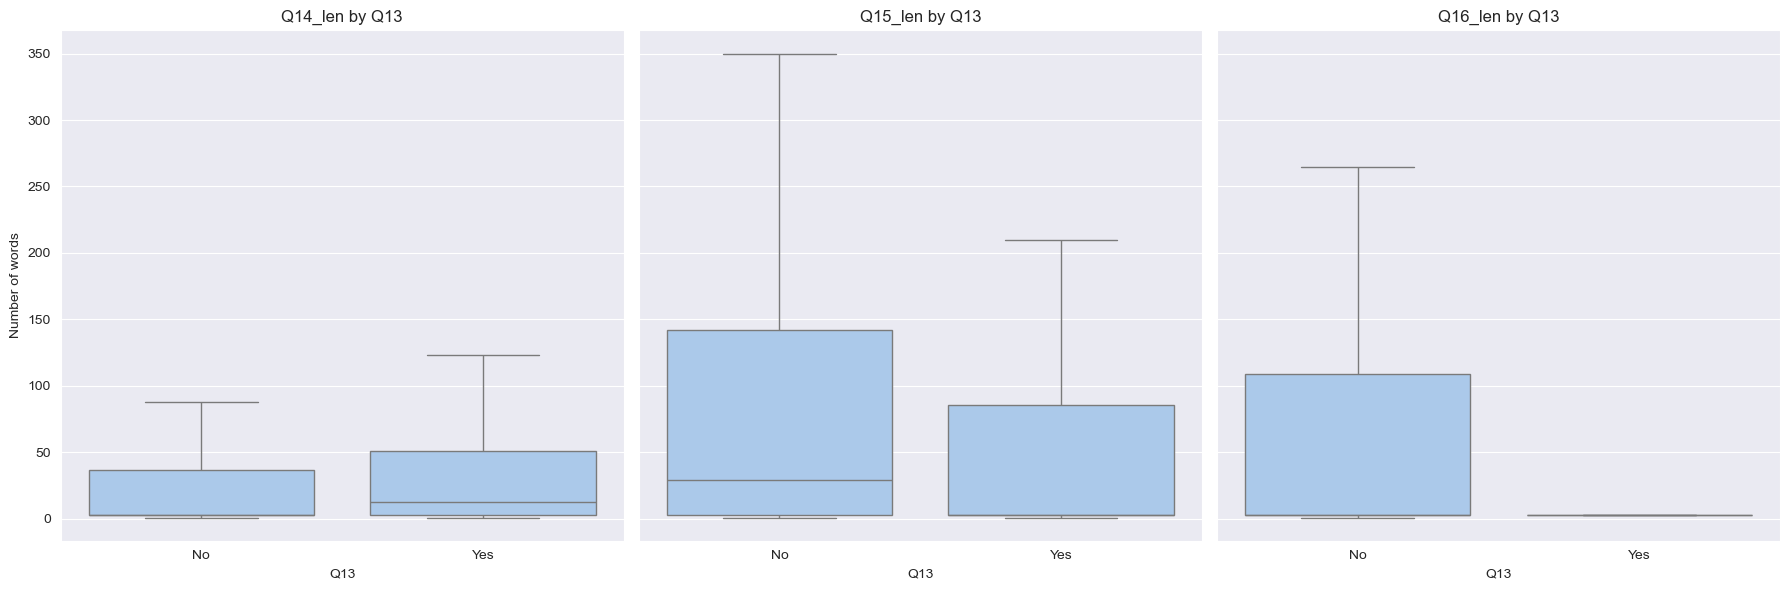

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure with 3 subplots in one row
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.set_palette('pastel')

# Boxplot for Q14_len
sns.boxplot(data=df, x='Q13', y='Q14_len', ax=axes[0], showfliers=False)
axes[0].set_title('Q14_len by Q13')
axes[0].set_ylabel('Number of words')

# Boxplot for Q15_len
sns.boxplot(data=df, x='Q13', y='Q15_len', ax=axes[1], showfliers=False)
axes[1].set_title('Q15_len by Q13')
axes[1].set_ylabel('')

# Boxplot for Q16_len
sns.boxplot(data=df, x='Q13', y='Q16_len', ax=axes[2], showfliers=False)
axes[2].set_title('Q16_len by Q13')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()


### Import NLP libraries
Here we import libraries to actually count the occurence of each word. This allows for a lexical sentiment analysis for words with positive or negative connotations, or just simply whether certain things were mentioned often. 

In [58]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.probability import FreqDist
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rosic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Define function to prepare strings
Here we prepare the strings. Usually text is very messy and needs some processing before words can be counted. For this, we remove punctuation, join letters to words, and remove stop words.

In [59]:
def text_process(mess):
    """
    from mess,
    remove punctuation 
    rejoin into string
    split string into single words
    remove stop words
    return cleaned mess
    """

# remove punctuation
    nopunc = [c for c in mess if c not in string.punctuation]

# join all letters to words again
    nopunc = ''.join(nopunc)

# split string into single words
    nopunc = nopunc.split()

# remove stop words
    stopwords_list = stopwords.words('german')
    stopwords_list.extend(['nan','immer','wäre','to','the','schon','finde','wurde','and','I','of'])
    return [word for word in nopunc if word.lower() not in stopwords_list] 

Lastly, we compute the frequencies for each question and plot them next to each other. Here we can see, that Q14 contains almost only nouns as the most frequent words. It is likely, that participants where asked to provide a list or something similar. Q15 and Q16 have mostly adjectives and adverbs as their most frequent words. Here the participants most likely provided a description or evaluation of the product. 

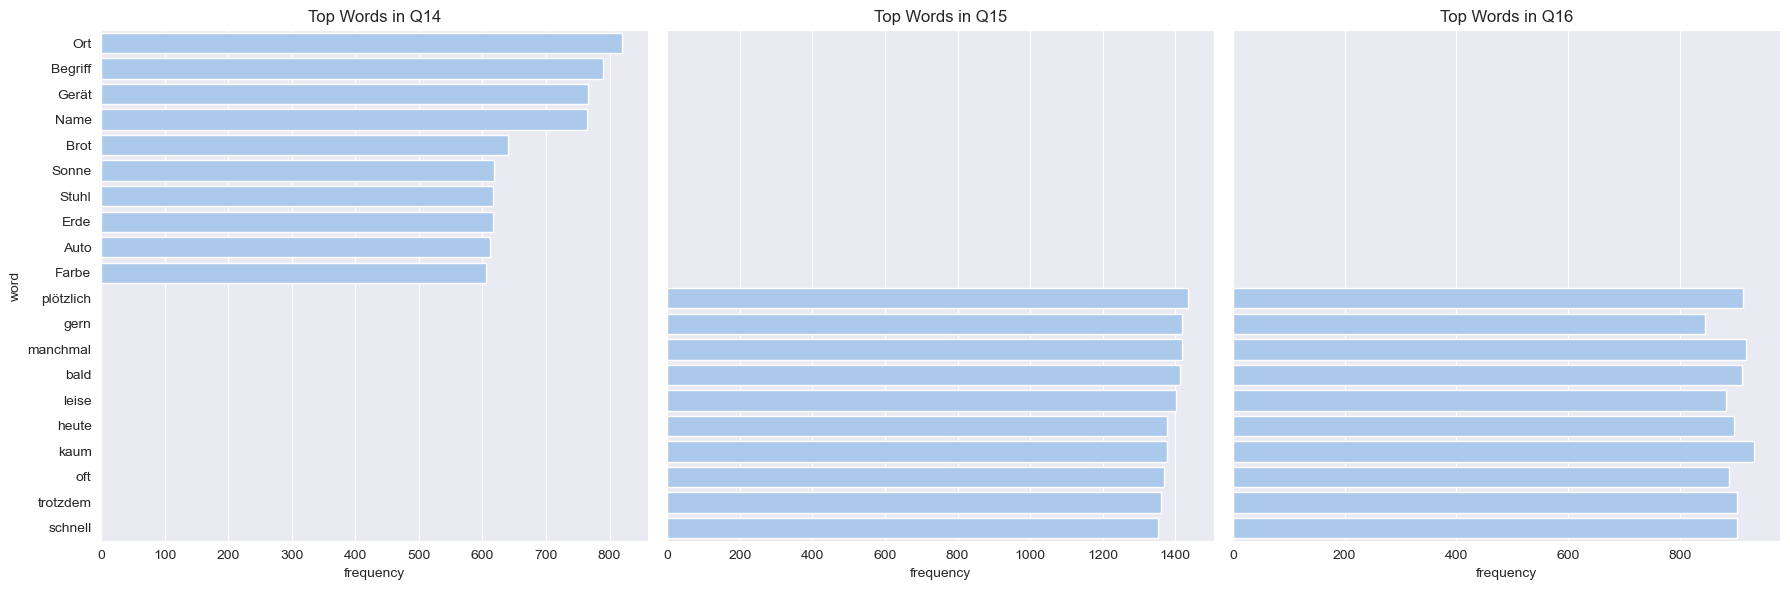

In [66]:
# --- Helper: Process text (assuming text_process is already defined) ---
def get_word_freq(df_col):
    text = " ".join(df_col.dropna().astype(str))  # Drop NaN and join
    words = text_process(text)                    # Your existing function
    fdist = FreqDist(words)
    return pd.DataFrame(fdist.items(), columns=['word', 'frequency']).sort_values('frequency', ascending=False)

# --- Compute frequency data for each question ---
df_fdist_Q14 = get_word_freq(df['Q14'])
df_fdist_Q15 = get_word_freq(df['Q15'])
df_fdist_Q16 = get_word_freq(df['Q16'])

# --- Set up the plot ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.set_palette('pastel')

# Plot for Q14
sns.barplot(data=df_fdist_Q14.head(10), x='frequency', y='word', ax=axes[0])
axes[0].set_title('Top Words in Q14')

# Plot for Q15
sns.barplot(data=df_fdist_Q15.head(10), x='frequency', y='word', ax=axes[1])
axes[1].set_title('Top Words in Q15')

# Plot for Q16
sns.barplot(data=df_fdist_Q16.head(10), x='frequency', y='word', ax=axes[2])
axes[2].set_title('Top Words in Q16')

# Layout adjustment
plt.tight_layout()
plt.show()


## 🎯 Project Highlights & Reflections

This project demonstrates how real-world survey data — even after strong anonymization — can be explored to extract structure, trends, and engagement patterns, without compromising privacy or intellectual property.

Key focus areas:

- **Privacy-Preserving Analytics**: Through hashing, timestamp shifting, text obfuscation, and feature renaming, the dataset maintains participant anonymity while retaining analytical utility.

- **Exploratory Analysis Techniques**: The notebook showcases a full workflow of EDA, including categorical breakdowns, Likert-scale normalization, timing analysis, and text preprocessing.

- **Workflow Transferability**: While specific findings are intentionally abstracted, the methods used here are transferable to customer feedback, HR surveys, UX research, or internal satisfaction tracking across industries.

- **Why This Matters**: In many real-world data roles, especially in B2B, health, or SaaS contexts, analysts must deliver insight under strict data privacy constraints. This project illustrates that balance in action.

